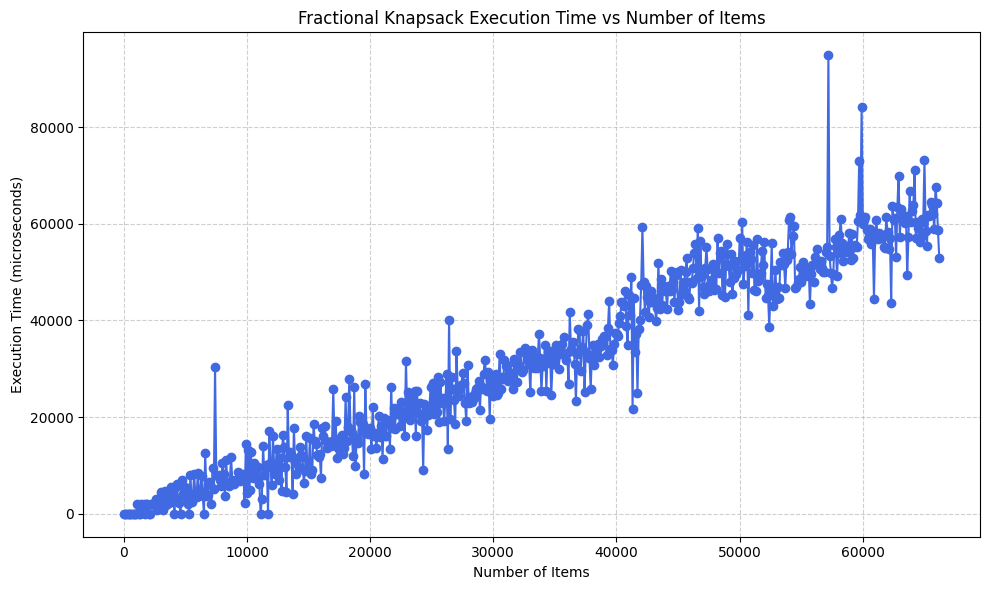

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data
df = pd.read_csv("time_analysis.csv")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(df["NumItems"], df["ExecutionTimeMicroseconds"], marker='o', linestyle='-', color='royalblue')
plt.title("Fractional Knapsack Execution Time vs Number of Items")
plt.xlabel("Number of Items")
plt.ylabel("Execution Time (microseconds)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


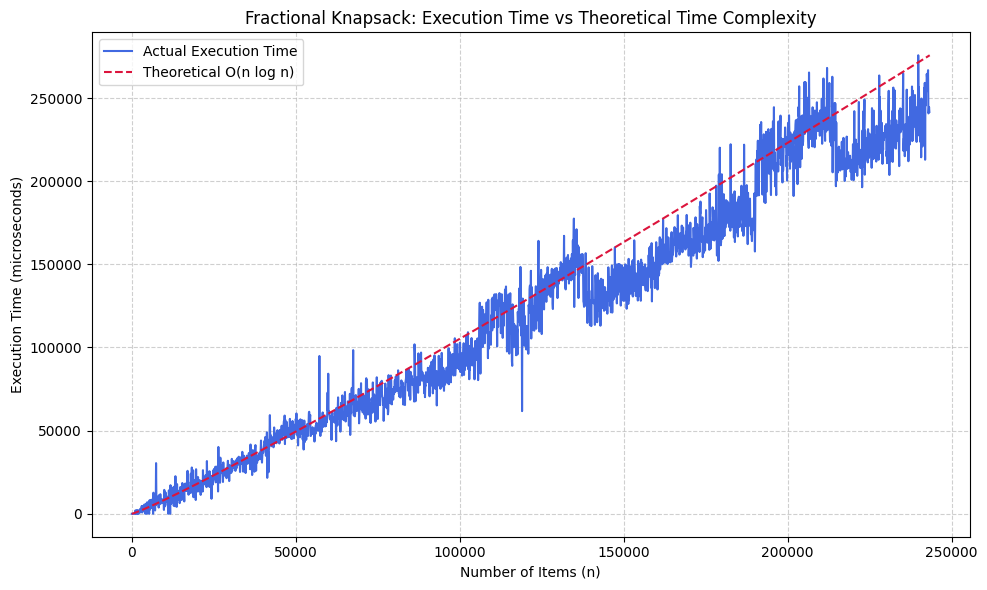

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df = pd.read_csv("time_analysis.csv")

# Generate the O(n log n) curve
n_values = df["NumItems"]
# Normalize n*log(n) to match scale of execution time
normalized_onlogn = (n_values * np.log2(n_values))
normalized_onlogn = normalized_onlogn / normalized_onlogn.max() * df["ExecutionTimeMicroseconds"].max()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(n_values, df["ExecutionTimeMicroseconds"], linestyle='-', color='royalblue', label="Actual Execution Time")
plt.plot(n_values, normalized_onlogn, linestyle='--', color='crimson', label="Theoretical O(n log n)")

plt.title("Fractional Knapsack: Execution Time vs Theoretical Time Complexity")
plt.xlabel("Number of Items (n)")
plt.ylabel("Execution Time (microseconds)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


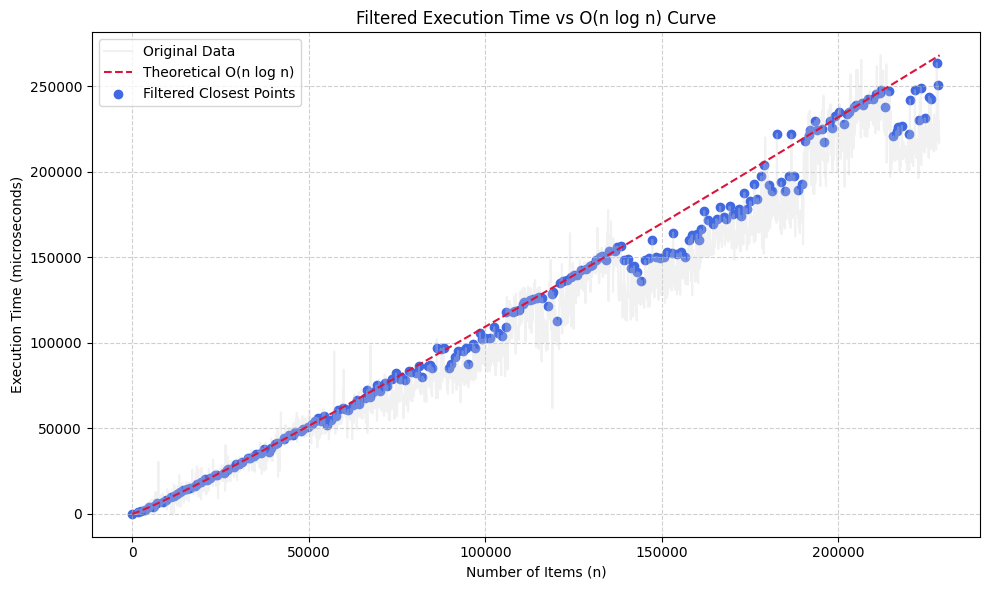

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df = pd.read_csv("time_analysis.csv")

# Generate the theoretical O(n log n) curve
n_values = df["NumItems"]
theoretical = n_values * np.log2(n_values)

# Normalize O(n log n) to the scale of execution time
normalized_theoretical = theoretical / theoretical.max() * df["ExecutionTimeMicroseconds"].max()

# Calculate the absolute difference between actual and theoretical
df["Difference"] = abs(df["ExecutionTimeMicroseconds"] - normalized_theoretical)

# Select the closest point out of every 1000 (or every N points)
group_size = 10
filtered_df = df.iloc[df.groupby(df.index // group_size)["Difference"].idxmin()]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["NumItems"], df["ExecutionTimeMicroseconds"], alpha=0.3, label="Original Data", color='lightgray')
plt.plot(n_values, normalized_theoretical, linestyle='--', color='crimson', label="Theoretical O(n log n)")
plt.scatter(filtered_df["NumItems"], filtered_df["ExecutionTimeMicroseconds"], color='royalblue', label="Filtered Closest Points")

plt.title("Filtered Execution Time vs O(n log n) Curve")
plt.xlabel("Number of Items (n)")
plt.ylabel("Execution Time (microseconds)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
